In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

device = torch.device('cpu')

# ODE vector field visualizations
This notebook shows examples of functions Neural ODEs cannot approximate and how this affects the learned vector fields.

#### Create an ODE function

In [2]:
from anode.models import ODEFunc

data_dim = 1  # We model 1d data to easily visualize it
hidden_dim = 16

# Create a 3-layer MLP as the ODE function f(h, t)
odefunc = ODEFunc(device, data_dim, hidden_dim, time_dependent=True)

#### Visualize vector field of ODE function
We can visualize what the randomly initialized ODE function's vector field looks like.

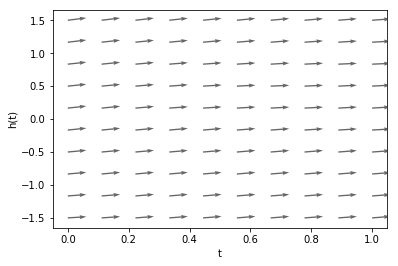

In [3]:
from viz.plots import vector_field_plt

vector_field_plt(odefunc, num_points=10, timesteps=10, 
                 h_min=-1.5, h_max=1.5)

## Create functions to approximate

We will approximate two functions: an easy one (the identity mapping) and a hard one (correspond to g_1d in the paper)

In [4]:
from experiments.dataloaders import Data1D
from torch.utils.data import DataLoader

data_easy = Data1D(num_points=500, target_flip=False)
data_hard = Data1D(num_points=500, target_flip=True)

dataloader_easy = DataLoader(data_easy, batch_size=32, shuffle=True)
dataloader_hard = DataLoader(data_hard, batch_size=32, shuffle=True)

#### Visualize the data

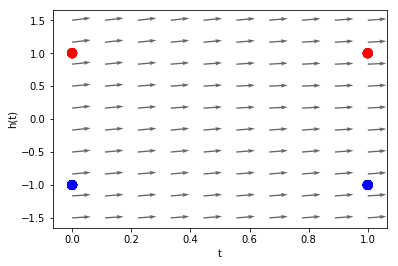

In [5]:
for inputs, targets in dataloader_easy:
    break

vector_field_plt(odefunc, num_points=10, timesteps=10,
                 inputs=inputs, targets=targets,
                 h_min=-1.5, h_max=1.5)

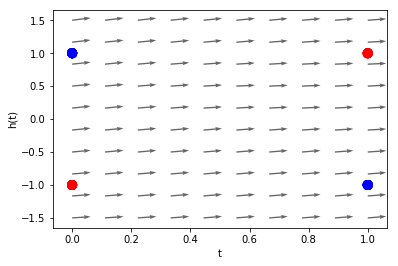

In [6]:
for inputs, targets in dataloader_hard:
    break

vector_field_plt(odefunc, num_points=10, timesteps=10,
                 inputs=inputs, targets=targets,
                 h_min=-1.5, h_max=1.5)

## Train a model on data

We can now try to fit a Neural ODE to the two functions

In [28]:
from anode.models import ODEBlock
from anode.training import Trainer

data_dim = 1
hidden_dim = 16

# Create a model for the easy function
odefunc_easy = ODEFunc(device, data_dim, hidden_dim, 
                       time_dependent=True)
model_easy = ODEBlock(device, odefunc_easy)

# Create a model for the hard function
odefunc_hard = ODEFunc(device, data_dim, hidden_dim, 
                       time_dependent=True)
model_hard = ODEBlock(device, odefunc_hard)

# Create an optimizer and trainer for easy function
optimizer_easy = torch.optim.Adam(model_easy.parameters(), lr=1e-3)
trainer_easy = Trainer(model_easy, optimizer_easy, device, print_freq=5)

# Create an optimizer and trainer for hard function
optimizer_hard = torch.optim.Adam(model_hard.parameters(), lr=5e-4)
trainer_hard = Trainer(model_hard, optimizer_hard, device, print_freq=5)

#### Train model on easy data

In [16]:
trainer_easy.train(dataloader_easy, num_epochs=10)


Iteration 0/16
Loss: 0.032
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.029
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.016
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 15/16
Loss: 0.018
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 1: 0.023

Iteration 0/16
Loss: 0.016
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.011
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.009
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.005
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 2: 0.009

Iteration 0/16
Loss: 0.005
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.005
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.003
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.003
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 3: 0.004

Iteration 0/16
Loss: 0.002
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 5/16
Loss: 0.002
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 0.001
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 15/16
Loss: 0.001
NFE: 14
BNFE: 0
Total NFE: 14
Epoch 4: 0.002

Ite

#### Visualize model trajectories
As can be seen, the learned vector field maps the inputs to targets correctly.

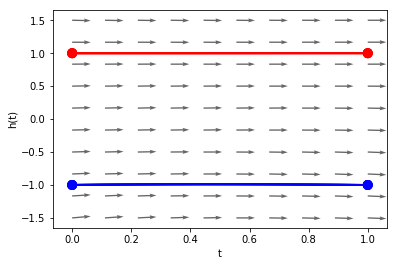

In [17]:
for inputs, targets in dataloader_easy:
    break

# Plot 8 trajectories
vector_field_plt(odefunc_easy, num_points=10, timesteps=10,
                 inputs=inputs[:8], targets=targets[:8],
                 h_min=-1.5, h_max=1.5, model=model_easy)

#### Train model on hard data

In [29]:
trainer_hard.train(dataloader_hard, num_epochs=50)


Iteration 0/16
Loss: 1.488
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 5/16
Loss: 1.467
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/16
Loss: 1.446
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 15/16
Loss: 1.452
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 1: 1.443

Iteration 0/16
Loss: 1.397
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 5/16
Loss: 1.400
NFE: 14
BNFE: 0
Total NFE: 14

Iteration 10/16
Loss: 1.378
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 15/16
Loss: 1.338
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 2: 1.411

Iteration 0/16
Loss: 1.339
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 5/16
Loss: 1.452
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/16
Loss: 1.318
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 15/16
Loss: 1.463
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 3: 1.386

Iteration 0/16
Loss: 1.363
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 5/16
Loss: 1.339
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 10/16
Loss: 1.343
NFE: 20
BNFE: 0
Total NFE: 20

Iteration 15/16
Loss: 1.318
NFE: 20
BNFE: 0
Total NFE: 20
Epoch 4: 1.353

Ite


Iteration 10/16
Loss: 0.558
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 15/16
Loss: 0.591
NFE: 32
BNFE: 0
Total NFE: 32
Epoch 34: 0.574

Iteration 0/16
Loss: 0.568
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 5/16
Loss: 0.544
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 10/16
Loss: 0.575
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 15/16
Loss: 0.549
NFE: 32
BNFE: 0
Total NFE: 32
Epoch 35: 0.567

Iteration 0/16
Loss: 0.542
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 5/16
Loss: 0.585
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 10/16
Loss: 0.545
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 15/16
Loss: 0.566
NFE: 32
BNFE: 0
Total NFE: 32
Epoch 36: 0.561

Iteration 0/16
Loss: 0.544
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 5/16
Loss: 0.547
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 10/16
Loss: 0.542
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 15/16
Loss: 0.554
NFE: 32
BNFE: 0
Total NFE: 32
Epoch 37: 0.556

Iteration 0/16
Loss: 0.541
NFE: 32
BNFE: 0
Total NFE: 32

Iteration 5/16
Loss: 0.561
NFE: 32
BNFE: 0
Total NFE: 32


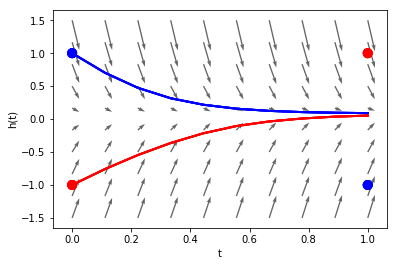

In [30]:
for inputs, targets in dataloader_hard:
    break

# Plot 8 trajectories
vector_field_plt(odefunc_hard, num_points=10, timesteps=10,
                 inputs=inputs[:8], targets=targets[:8],
                 h_min=-1.5, h_max=1.5, model=model_hard)

## Augmented Neural ODEs
As can be seen, Neural ODEs struggle to fit the hard function. In fact, it can be proven that Neural ODEs cannot represent this function. In order to overcome this, we can use Augmented Neural ODEs which extend the space on which the ODE is solved. Examples of this are shown in the `augmented-neural-ode-example` notebook.